In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
from PIL import Image

In [2]:
class grid():
    def __init__ (self, CFL):
    
        self.L = 20
        self.T = 18
        self.h = 0.5
        self.CFL = CFL
        self.tau = self.h * CFL
        self.xr = np.arange(0, (self.L + self.h/2) , self.h)
        self.tr = np.arange(0, (self.T + self.tau/2), self.tau)
        self.N = len(self.tr)
        self.M = len(self.xr)
    

In [3]:
grids = [grid(0.6), grid(0.6), grid(1.01)]

In [4]:
u0 = lambda grid, x: np.sin(2*np.pi * x / grid.L)

In [8]:
def Graphs(grid, u):
    fig, axs = plt.subplots(5)
    for i, T in enumerate([0, 5, 10, 15, 18]):
        axs[i].plot(grid.xr, u[int(T/grid.tau)])
        axs[i].set_xlabel('y')
        axs[i].set_ylabel('t')
        axs[i].grid(which = 'both')
        axs[i].set_xlim(0, grid.L)
        axs[i].set_title(f'Для момента времени {T}')
    axs[0].set_title(f'CFL={grid.CFL}')
    fig.set_figheight(15)
    fig.set_figwidth(10)
    plt.subplots_adjust(hspace=0.6)

In [10]:
def corner(grid):
    u = np.zeros([grid.N, grid.M])
    u[0] = [u0(grid, x) for x in grid.xr]
    for i in range(grid.N-1):
        for j in range(1, grid.M):
            u[i+1][j] = u[i][j] - (grid.tau/grid.h)*(u[i][j] - u[i][j-1])
        u[i+1][0] = u[i+1][grid.M-1]
    return u

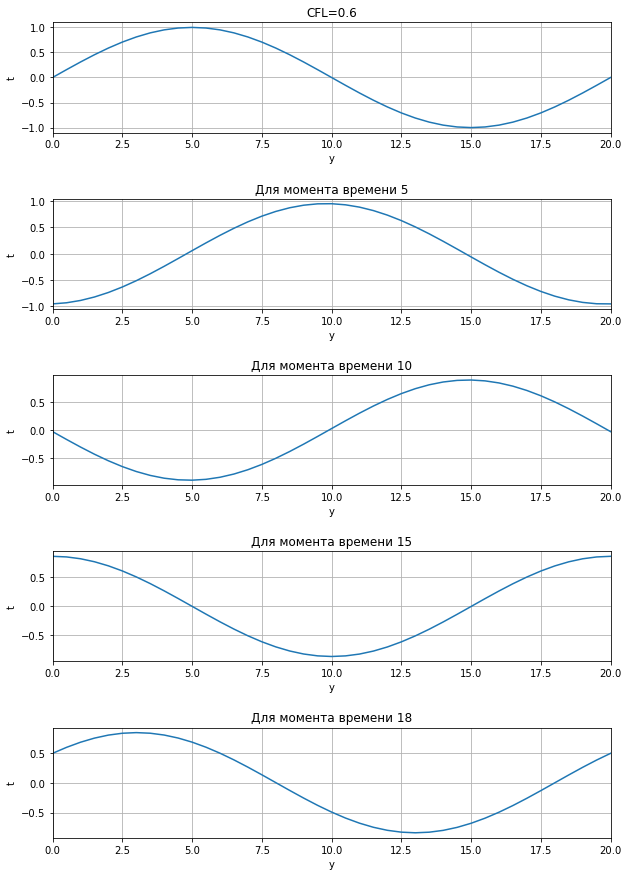

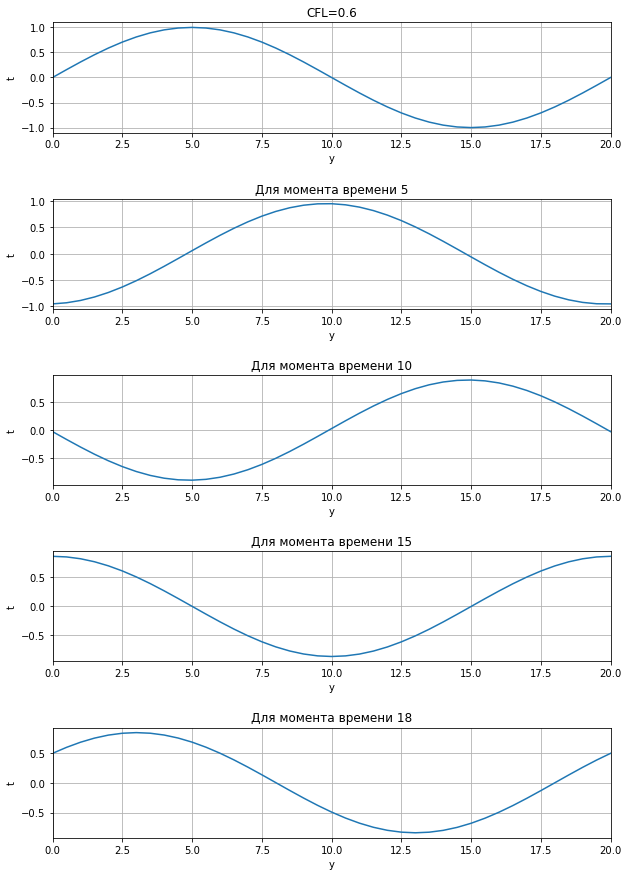

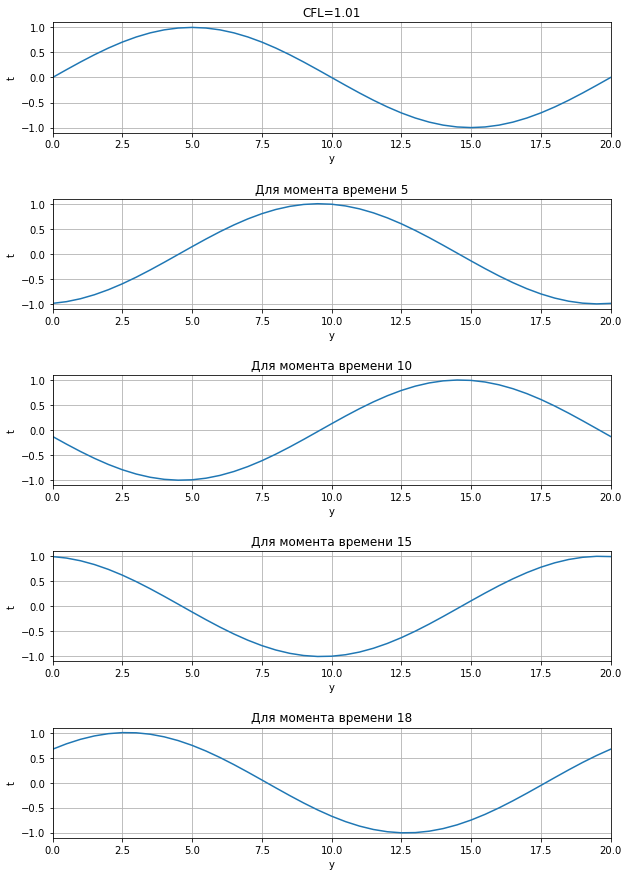

In [11]:
for i in range(len(grids)):
    Graphs(grids[i], corner(grids[i]))

In [12]:
a = 1
f = lambda grid, Prev, Next, Curr: Curr - grid.tau*(a/2/grid.h *(Next-Prev) - a**2*grid.tau/2/grid.h**2*(Next - 2*Curr + Prev))

In [13]:
def Lax_Wen(grid):
    u = np.zeros([grid.N, grid.M])
    u[0] = [u0(grid, x) for x in grid.xr]
    for i in range(grid.N-1):
        u[i+1][0] = f(grid, u[i][grid.M-1], u[i][1], u[i][0])
        for j in range (1, grid.M-1):
            u[i+1][j] = f(grid, u[i][j-1], u[i][j+1], u[i][j])
        u[i+1][grid.M-1] = f(grid, u[i][grid.M-2], u[i][0], u[i][grid.M-1])
    return u
      

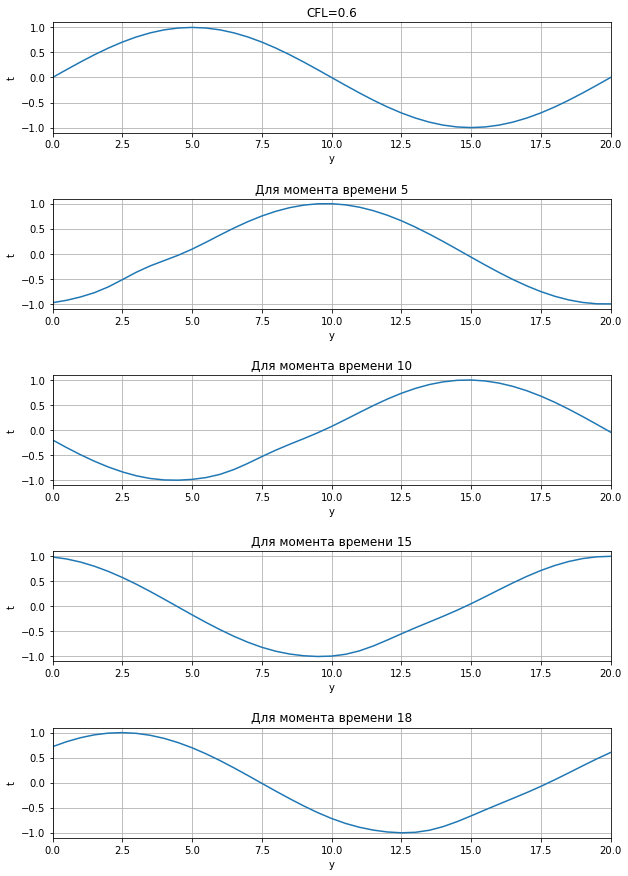

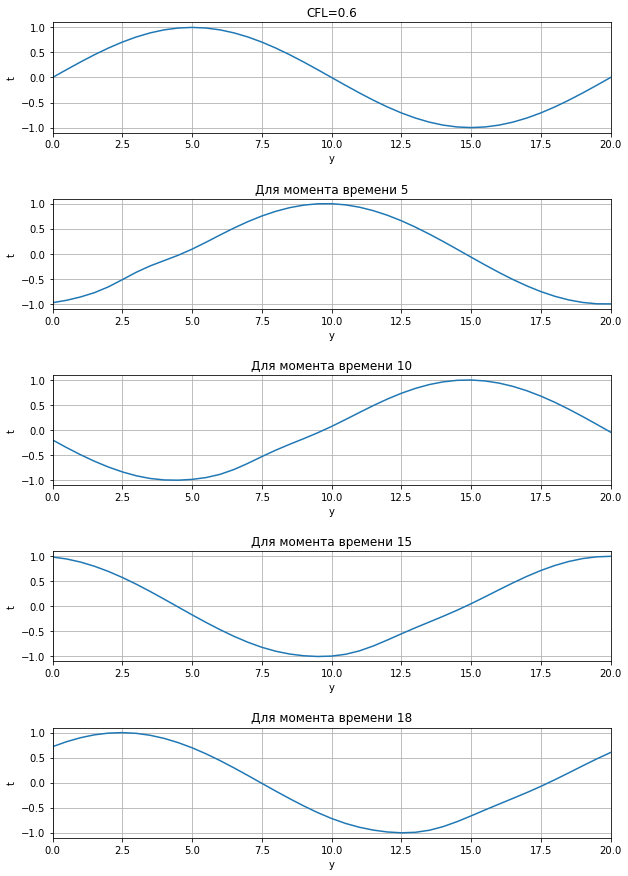

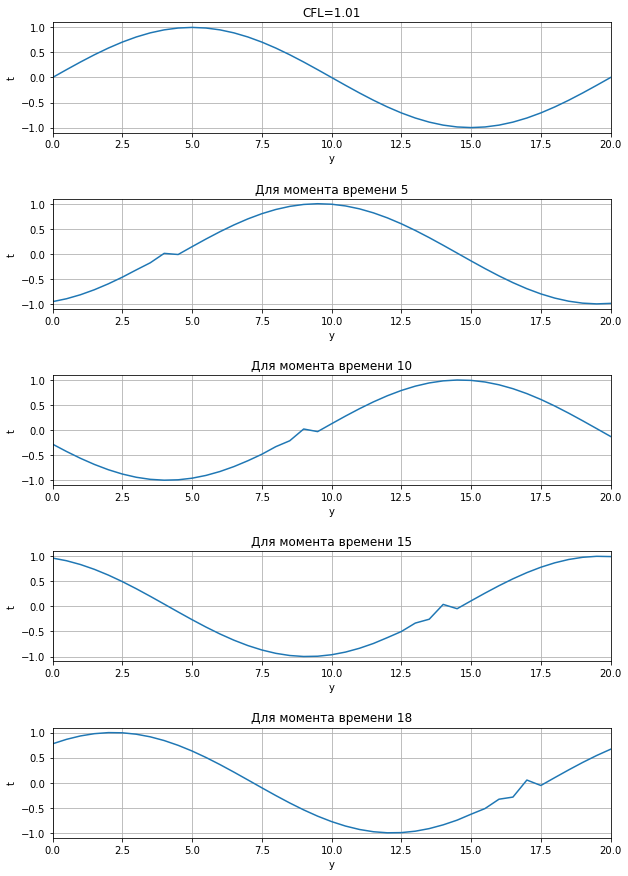

In [14]:
for i in range(len(grids)):
    Graphs(grids[i], Lax_Wen(grids[i]))

Почему при CFL = 1 такое странное?

In [15]:
u = Lax_Wen(grids[0])

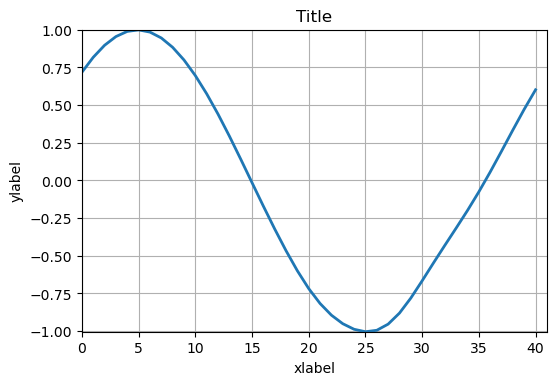

In [17]:
fig, ax = plt.subplots(dpi = 100)
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, len(u[0]))
ax.set_ylim(np.min(u), np.max(u))
ax.set_title('Title')
ax.grid()
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# Функция для обновления данных в каждом кадре анимации
def update(frame):
    line.set_data(np.arange(len(u[frame])), u[frame])
    return line,

# Создание анимации
ani = FuncAnimation(fig, update, frames=len(u), blit=True)

# Сохранение анимации в GIF файл
ani.save('animation.gif', writer='pillow', dpi=100)
